In [2]:
import jieba
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy

In [3]:
def error(true, pred):
    error = np.square(np.subtract(np.exp(true),np.exp(pred))).mean(axis=0)
    return error

In [4]:
df = pd.read_excel("raw_data.xlsx",skiprows=1,usecols=["微博正文","点赞数","转发数","评论数"])
df = df.rename(columns = {'微博正文':'text', '点赞数':'like', '转发数':'forward','评论数':'comment'}, inplace=False)

In [5]:
df.head()

,text,like,forward,comment
0,【#你好，明天#】岁末年初，即便你的年终盘点一言难尽，但新年的flag仍然计日可期。需要抓住...,5389,1997,406
1,【今天，发条微博，向这些“闪亮的名字”致敬】南仁东、林俊德、张超、王继才、黄群、宋月才、姜开...,6826,1268,289
2,【夜读：这一年，谢谢自己】转眼间，2018年就要过去了。有时候我们很怕，怕自己的成长速度跟不...,6565,4326,580
3,【小调查：跨年夜，你如何度过的？】#2018最后一天#，你是如何度过的？陪在家人身边？宅在家...,919,2562,5281
4,【揭秘！习主席书架上的新变化】今晚，习近平主席发表了#2019新年贺词#。这一次，习主席书架...,6513,1758,440


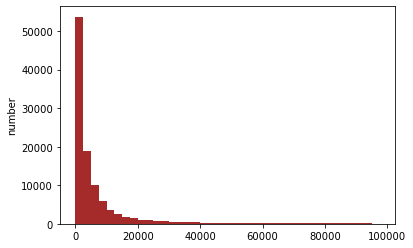

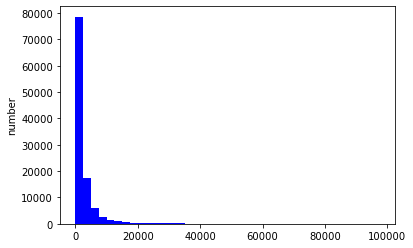

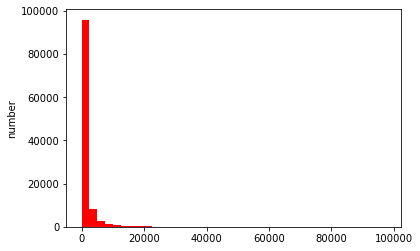

In [6]:
plt.hist(df['like'], bins=np.arange(0,100000,2500), color = 'brown')
plt.ylabel('number')
plt.show()

plt.hist(df['forward'], bins=np.arange(0,100000,2500), color = 'blue')
plt.ylabel('number')
plt.show()

plt.hist(df['comment'], bins=np.arange(0,100000,2500), color = 'red')
plt.ylabel('number')
plt.show()

<ipython-input-7-1aefa403d135>:6: RuntimeWarning: divide by zero encountered in log
  y = np.log(df[['like','forward','comment']])


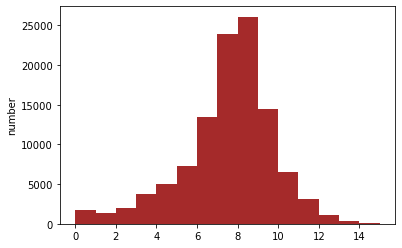

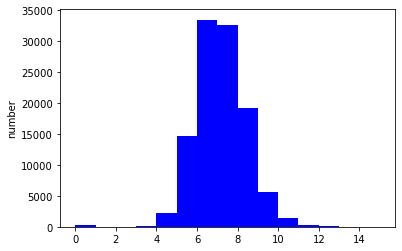

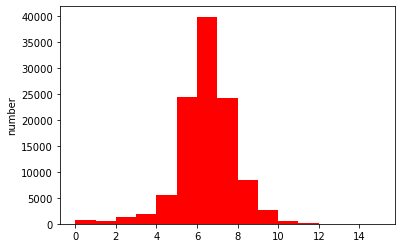

In [7]:
f = open('tfidf.txt', 'r')
allsentences = f.readlines()

for i in range(len(allsentences)):
    allsentences[i] = allsentences[i].strip('\n')
y = np.log(df[['like','forward','comment']])
f.close()

#log几乎不影响

t = scipy.sparse.coo_matrix(y)
for i, j, v in zip(t.row, t.col, t.data):
    if (np.isnan(v) or np.isinf(v)):
        y.iloc[i, j] = 0

plt.hist(y['like'], bins=np.arange(0,16,1), color = 'brown')
plt.ylabel('number')
plt.show()

plt.hist(y['forward'], bins=np.arange(0,16,1), color = 'blue')
plt.ylabel('number')
plt.show()

plt.hist(y['comment'], bins=np.arange(0,16,1), color = 'red')
plt.ylabel('number')
plt.show()


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(allsentences, y, test_size=.3, train_size=.7, random_state=0)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

 
#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features = 10000)
#该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()

tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(X_train))
X_train_weight = tf_idf
#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重

#对测试集进行tf-idf权重计算
tf_idf = tf_idf_transformer.transform(vectorizer.transform(X_test))
X_test_weight = tf_idf

In [13]:
model = LinearRegression()
model.fit(X_train_weight, y_train)
y_train_pred = model.predict(X_train_weight)
y_test_pred = model.predict(X_test_weight)

In [14]:
train_error = np.absolute(np.subtract(np.exp(y_train.to_numpy()),np.exp(y_train_pred))).mean(axis=0)
print(train_error)

test_error = np.absolute(np.subtract(np.exp(y_test.to_numpy()),np.exp(y_test_pred))).mean(axis=0)
print(test_error)

[12240.8485751   5037.8056129   1173.41195107]
[13317.31412094  5205.49306221  1221.45838774]


In [15]:
new = np.array(['【宁波24岁姑娘徒步西藏墨脱失踪9天】小许，女，24岁，宁波慈溪人，身高160cm，戴眼镜。7月14日，小许带着2000元独自出发骑行318川藏线，到八一后准备徒步去墨脱。8月17日晚，她跟两个男生逃票进入派乡，之后失去联系！目前，当地警方已经介入开始找人。祝平安！慈溪24岁姑娘徒步西藏墨脱失踪9天了还没有消息·都市快报 @都市快报  原图 '])
weight = tf_idf_transformer.transform(vectorizer.transform(new))
pred = model.predict(weight)
print(np.exp(pred))

[[191.11886701 871.25871791 826.90838998]]


true: 125  1332  886